## Plot graphs

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read in results by country with visitors stats (file not included in the repo before checking permission to share..)
data = pd.read_csv('results_by_country_w_visitor_stats.csv')
data.set_index("FIPS", drop=True, inplace=True)

### Test with one method only

In [3]:
# Set number of top countries to include in the comparison
n=25

# Set method
method = "H_MedianCenters"

In [4]:
data.head()

,B_CircleCentroids,B_dbscan_500_km,B_EllipseCentroids,B_maxdays,B_maxmonths,B_maxposts,B_maxtimedelta,B_maxweeks,B_MeanCenters,B_MedianCenters,...,H_dbscan_500km,H_EllipseCentroids,H_maxdays,H_maxmonths,H_maxposts,H_maxtimedelta,H_maxweeks,H_MeanCenters,H_MedianCenters,YEAR2014
FIPS,,,,,,,,,,,,,,,,,,,,,
AF,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
AG,37.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,37.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
AQ,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269
AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
maxdays_top = data[method].sort_values(ascending=False).rank(ascending=False).head(n)


In [6]:
kruger2014_top = data.YEAR2014.sort_values(ascending=False).rank(ascending=False).head(n)

In [7]:
comparison = kruger2014_top.to_frame(name="Official visitor statistics").join(maxdays_top.to_frame(name=method), how="outer")
comparison.sort_values(by=method)

,Official visitor statistics,H_MedianCenters
FIPS,,
SF,1.0,1.0
US,5.0,2.0
UK,4.0,3.0
IT,9.0,4.0
BR,19.0,5.0
AS,8.0,6.5
FR,3.0,6.5
SP,16.0,8.5
GM,2.0,8.5


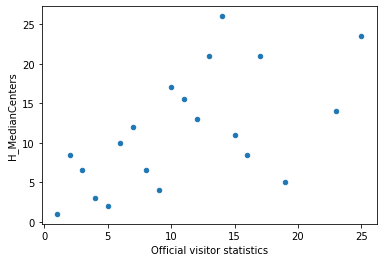

In [8]:
comparison.plot.scatter(x="Official visitor statistics", y=method)

## Plot slopegraph - one method

In [9]:
import glob
import os
folder = r"P:\h510\some\manuscripts\2020_someorigins\Results\expert_assesment"
files = glob.glob(os.path.join(folder,"*430_users_expert_*csv"))

codes_fp = os.path.join(folder, "origin_assesment_country_codes.csv")
codes = pd.read_csv(codes_fp, sep=";")
country_dict = codes.set_index("country", drop=True).to_dict()



In [10]:
# Fix labels the method
labels = []

for value in comparison[method]:
    countries = list(comparison.loc[comparison[method]==value].index)
    label = '/'.join(countries)
    labels.append(label)

In [11]:
# These positions 
comparison[method].values

array([18.5,  6.5, 23.5, 26. ,  5. , 17. ,  nan, 21. ,  6.5,  nan,  nan,
        8.5, 21. ,  nan,  4. , 12. , 10. , 14. , 23.5, 13. , 21. ,  1. ,
       15.5,  8.5, 11. , 15.5, 18.5,  3. ,  2. ,  nan])

In [12]:
# Will get these labels:
labels

['AE/TH',
 'AS/FR',
 'AU/PL',
 'BE',
 'BR',
 'CA',
 '',
 'DA/IN/RS',
 'AS/FR',
 '',
 '',
 'GM/SP',
 'DA/IN/RS',
 '',
 'IT',
 'MZ',
 'NL',
 'NO',
 'AU/PL',
 'PO',
 'DA/IN/RS',
 'SF',
 'SN/SZ',
 'GM/SP',
 'SW',
 'SN/SZ',
 'AE/TH',
 'UK',
 'US',
 '']

plotting the slopegraph:

([<matplotlib.axis.XTick at 0x155f541a848>,
 [Text(0, 0, 'Visitor statistics'), Text(0, 0, 'H_MedianCenters')])

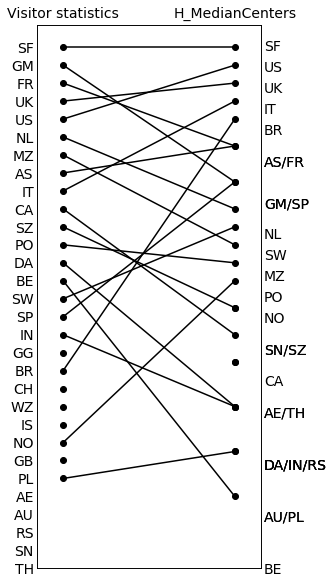

In [13]:
import matplotlib.pyplot as plt

# Set figure size 
fig, ax = plt.subplots(figsize=(4,10))

# Create plot
comparison.T.plot(ax=ax, style='o-', legend=False, color='black')

# Invert so that rank number 1 (South Africa) is at the top
ax.invert_yaxis()

# Set y-axis values for the LEFT side (visitor statistics)
plt.yticks(range(1,31), list(comparison.sort_values(by="Official visitor statistics").index), fontsize=14)
plt.xticks([0,1], ['Visitor statistics', method], fontsize=14)

# Set a second axis
ax2 = ax.twinx()  

# Plot data also on this axis (to get the y-axis match..)
#comparison.T.plot(ax=ax2, style='', legend=False, color='black')

# Invert so that rank number 1 (South Africa) is at the top
ax2.invert_yaxis()

# Plot y-axis values for the RIGHT side (maxdays-method)
plt.yticks(comparison[method].values, labels, fontsize=14)

# Add whitespace to x axis margins
ax.margins(x=.15)
ax2.margins(x=.15)

# Remove tick sticks
ax.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)

# Place x-axis labels at the top of the plot
ax.xaxis.tick_top()

# X-axis labels
plt.xticks([0,1], ['Visitor statistics', method], fontsize=14)


#plt.savefig("fig/slopegraph_kruger_{}.png".format(method), bbox_inches='tight')


## Plot slopegraph - several methods

In [14]:
def get_rank(col, n=30):
    """Get top n origin countries detected by specified method (col)"""
    rank_series = data[col].sort_values(ascending=False).rank(ascending=False).head(n)
    return rank_series

In [15]:
# Get top n countries from each method
top=30
median = get_rank("H_MedianCenters",top)
maxtimedelta = get_rank("H_maxtimedelta",top)
months = get_rank("H_maxmonths",top)
kruger = get_rank("YEAR2014",top)

In [16]:
ranks = pd.DataFrame([median, maxtimedelta, months, kruger]).T
ranks.head()

,H_MedianCenters,H_maxtimedelta,H_maxmonths,YEAR2014
SF,1.0,1.0,1.0,1.0
US,2.0,2.0,2.0,5.0
UK,3.0,3.0,3.0,4.0
IT,4.0,5.0,5.0,9.0
BR,5.0,4.0,4.0,19.0


In [17]:
ranks.reset_index(inplace=True)

In [18]:
ranks.head()

,index,H_MedianCenters,H_maxtimedelta,H_maxmonths,YEAR2014
0,SF,1.0,1.0,1.0,1.0
1,US,2.0,2.0,2.0,5.0
2,UK,3.0,3.0,3.0,4.0
3,IT,4.0,5.0,5.0,9.0
4,BR,5.0,4.0,4.0,19.0


In [19]:
country_codes = country_dict["FIPS"]
country_codes = dict(zip(country_codes.values(), country_codes.keys()))

In [20]:
ranks.replace({"index": country_codes}, inplace=True)
ranks.set_index("index", drop=False, inplace=True)
ranks.head()

,index,H_MedianCenters,H_maxtimedelta,H_maxmonths,YEAR2014
index,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0
United States,United States,2.0,2.0,2.0,5.0
United Kingdom,United Kingdom,3.0,3.0,3.0,4.0
Italy,Italy,4.0,5.0,5.0,9.0
Brazil,Brazil,5.0,4.0,4.0,19.0


In [21]:
# There will be more than n rows, coz top countries don't match between all methods and visitor stats
len(ranks)

44

In [22]:
ranks.loc["Gabon", "H_MedianCenters"]

nan

In [23]:
# Save ranks to file
ranks.to_csv(r"P:\h510\some\manuscripts\2020_someorigins\Results\top_%s_countries_best_methods.csv" % top, sep=";")

In [24]:
#Re-organize columns
ranks = ranks[['index','YEAR2014', 'H_maxmonths', 'H_maxtimedelta', 'H_MedianCenters']]


In [25]:
ranks.head()

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters
index,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0
United States,United States,5.0,2.0,2.0,2.0
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0
Italy,Italy,9.0,5.0,5.0,4.0
Brazil,Brazil,19.0,4.0,4.0,5.0


In [26]:


ranks["official_ranks"] = ranks.apply(lambda x: x["index"] + " (" + str(x["YEAR2014"]) +")", axis=1)

# Remove zeros 
ranks["official_ranks"] = ranks["official_ranks"].apply(lambda x: x.replace(".0",""))


In [27]:
ranks.head()

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters,official_ranks
index,,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0,South Africa (1)
United States,United States,5.0,2.0,2.0,2.0,United States (5)
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0,United Kingdom (4)
Italy,Italy,9.0,5.0,5.0,4.0,Italy (9)
Brazil,Brazil,19.0,4.0,4.0,5.0,Brazil (19)


In [28]:
last_column = ranks["H_MedianCenters"].name

# round values (shared ranks have .5)
ranks = ranks.round()
ranks.head()

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters,official_ranks
index,,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0,South Africa (1)
United States,United States,5.0,2.0,2.0,2.0,United States (5)
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0,United Kingdom (4)
Italy,Italy,9.0,5.0,5.0,4.0,Italy (9)
Brazil,Brazil,19.0,4.0,4.0,5.0,Brazil (19)


In [29]:
# convert to string
ranks["last_column_ranks"] = ranks.apply(lambda x: x["index"] + " (" + str(x[last_column]) +")", axis=1)

# Remove zeros 
ranks["last_column_ranks"] = ranks["last_column_ranks"].apply(lambda x: x.replace(".0",""))

In [30]:
ranks.head()

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters,official_ranks,last_column_ranks
index,,,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0,South Africa (1),South Africa (1)
United States,United States,5.0,2.0,2.0,2.0,United States (5),United States (2)
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0,United Kingdom (4),United Kingdom (3)
Italy,Italy,9.0,5.0,5.0,4.0,Italy (9),Italy (4)
Brazil,Brazil,19.0,4.0,4.0,5.0,Brazil (19),Brazil (5)


In [31]:
# Take a copy for sa only
ranks_sa = ranks.dropna(subset=["YEAR2014"], axis=0).copy()

In [32]:

offset_dict = {0: -.2, 1: -.0, 2: 0.2, 
               3: 0.4, 4: 0.6, 5: 0.8,
               6: 1., 7: 1.2}

def offset_duplicates(column):

    for value in ranks[column]:
        countries = list(ranks.loc[ranks[column]==value].index)
        
        if len(countries)>1:
            print(countries)
            for value in range(len(countries)):
                
                # Offset rank for overlapping countries
                ranks.loc[countries[value],column] = ranks.loc[countries[value],column] + offset_dict[value]                
                
for column in ['YEAR2014', 'H_maxmonths', 'H_maxtimedelta', 'H_MedianCenters']:
    offset_duplicates(column)

['United Arab Emirates', 'Thailand']
['Poland', 'Belgium', 'New Zealand']
['Hong Kong', 'Mexico', 'Israel']
['Indonesia', 'Ireland', 'Saudi Arabia']
['Mozambique', 'Russia']
['Norway', 'Canada']
['Switzerland', 'Mexico']
['United Arab Emirates', 'Thailand', 'Denmark']
['Poland', 'Belgium', 'Turkey', 'China', 'Indonesia', 'Kenya']
['France', 'Australia']
['Germany', 'Spain']
['Switzerland', 'Singapore']
['United Arab Emirates', 'Thailand']
['Russia', 'Denmark', 'India']
['Poland', 'Austria']
['Belgium', 'United Republic of Tanzania', 'Hong Kong']
['Czech Republic', 'Turkey', 'Swaziland']


In [33]:
ranks.head()

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters,official_ranks,last_column_ranks
index,,,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0,South Africa (1),South Africa (1)
United States,United States,5.0,2.0,2.0,2.0,United States (5),United States (2)
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0,United Kingdom (4),United Kingdom (3)
Italy,Italy,9.0,5.0,5.0,4.0,Italy (9),Italy (4)
Brazil,Brazil,19.0,4.0,4.0,5.0,Brazil (19),Brazil (5)


In [34]:
labels2 = []

for value in ranks[last_column]:
    countries = list(ranks.loc[ranks[last_column]==value].index)
    
    if len(countries)>1:
        print(countries)
    label = '/'.join(countries)
    labels2.append(label)

In [35]:
# Check that the labels are correct
#ranks[["YEAR2014", "official_ranks"]]

In [36]:
# Check that the labels are correct
#ranks[[last_column, "last_column_ranks"]]

([<matplotlib.axis.XTick at 0x155f566b608>,
 [Text(0, 0, 'Visitor statistics'),
  Text(0, 0, 'Best method A'),
  Text(0, 0, 'Best method B'),
  Text(0, 0, 'Best method C')])

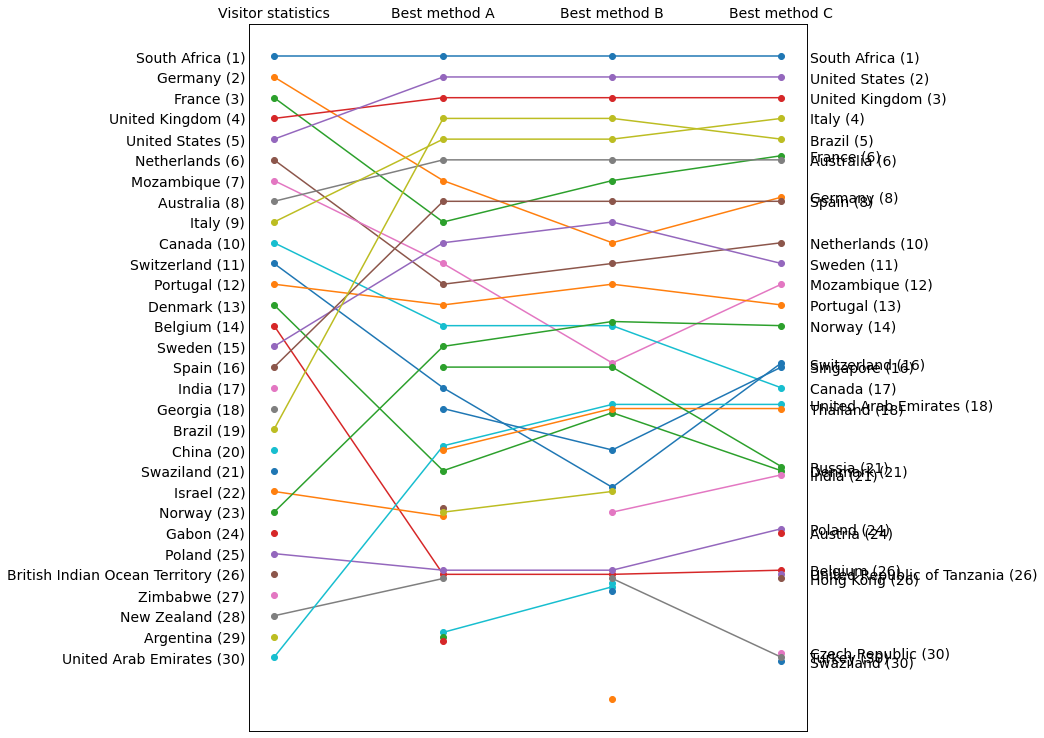

In [37]:

plot_cols=['YEAR2014', 'H_maxmonths', 'H_maxtimedelta', 'H_MedianCenters']
ranks.sort_values(by="YEAR2014", inplace=True)

# Set figure size 
fig, ax = plt.subplots(figsize=(10,13))

# Create plot
#ranks.T.plot(ax=ax, style='o-', legend=False, color='black')
ranks[plot_cols].T.plot(ax=ax, style='o-', legend=False, cmap='RdYlGn')

# Invert so that rank number 1 (South Africa) is at the top
ax.invert_yaxis()

# Set y-axis values for the LEFT side (visitor statistics)
plt.yticks(ranks["YEAR2014"].values, ranks["official_ranks"].values, fontsize=14)
#plt.yticks(range(1,(top+1)), list(ranks.sort_values(by="YEAR2014").index), fontsize=14)
plt.xticks([0,1,2,3], ['Visitor statistics', "Hierarchical\nmax months", "Hierarchical\nmax timedelta","Hierarchical\nmedian centers"], fontsize=14)

# Set a second axis
ax2 = ax.twinx()  

# Plot data also on this axis (to get the y-axis match..)
ranks[plot_cols].T.plot(ax=ax2, style='', legend=False, color='black', alpha=0)

# Invert so that rank number 1 (South Africa) is at the top
ax2.invert_yaxis()


# Plot y-axis values for the RIGHT side (maxdays-method)
plt.yticks(ranks.sort_values(by=last_column)[last_column].values, ranks.sort_values(by=last_column)["last_column_ranks"].values, fontsize=14)
#plt.yticks(ranks[last_column].values, labels2, fontsize=14)

# Add whitespace to x axis margins
#ax.margins(x=.1)
#ax2.margins(x=.1)

# Remove tick sticks
ax.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)

# Place x-axis labels at the top of the plot
ax.xaxis.tick_top()

# X-axis labels
plt.xticks([0,1,2,3], ['Visitor statistics', "Best method A", "Best method B", "Best method C"], fontsize=20)


#plt.savefig("./../slopegraph_top3_methods.png", bbox_inches='tight')
#plt.savefig("fig/slopegraph_top3_methods.svg", bbox_inches='tight')


Plot only countrues in Official stats top 30

In [38]:
ranks_sa.head()

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters,official_ranks,last_column_ranks
index,,,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0,South Africa (1),South Africa (1)
United States,United States,5.0,2.0,2.0,2.0,United States (5),United States (2)
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0,United Kingdom (4),United Kingdom (3)
Italy,Italy,9.0,5.0,5.0,4.0,Italy (9),Italy (4)
Brazil,Brazil,19.0,4.0,4.0,5.0,Brazil (19),Brazil (5)


In [39]:
ranks = ranks_sa

In [40]:
for column in ['YEAR2014', 'H_maxmonths', 'H_maxtimedelta', 'H_MedianCenters']:
    offset_duplicates(column)

['Poland', 'Belgium', 'New Zealand']
['Norway', 'Canada']
['United Arab Emirates', 'Denmark']
['Poland', 'Belgium', 'China']
['France', 'Australia']
['Germany', 'Spain']
['Denmark', 'India']


In [41]:
ranks

,index,YEAR2014,H_maxmonths,H_maxtimedelta,H_MedianCenters,official_ranks,last_column_ranks
index,,,,,,,
South Africa,South Africa,1.0,1.0,1.0,1.0,South Africa (1),South Africa (1)
United States,United States,5.0,2.0,2.0,2.0,United States (5),United States (2)
United Kingdom,United Kingdom,4.0,3.0,3.0,3.0,United Kingdom (4),United Kingdom (3)
Italy,Italy,9.0,5.0,5.0,4.0,Italy (9),Italy (4)
Brazil,Brazil,19.0,4.0,4.0,5.0,Brazil (19),Brazil (5)
France,France,3.0,9.0,7.0,5.8,France (3),France (6)
Australia,Australia,8.0,6.0,6.0,6.0,Australia (8),Australia (6)
Germany,Germany,2.0,7.0,10.0,7.8,Germany (2),Germany (8)
Spain,Spain,16.0,8.0,8.0,8.0,Spain (16),Spain (8)


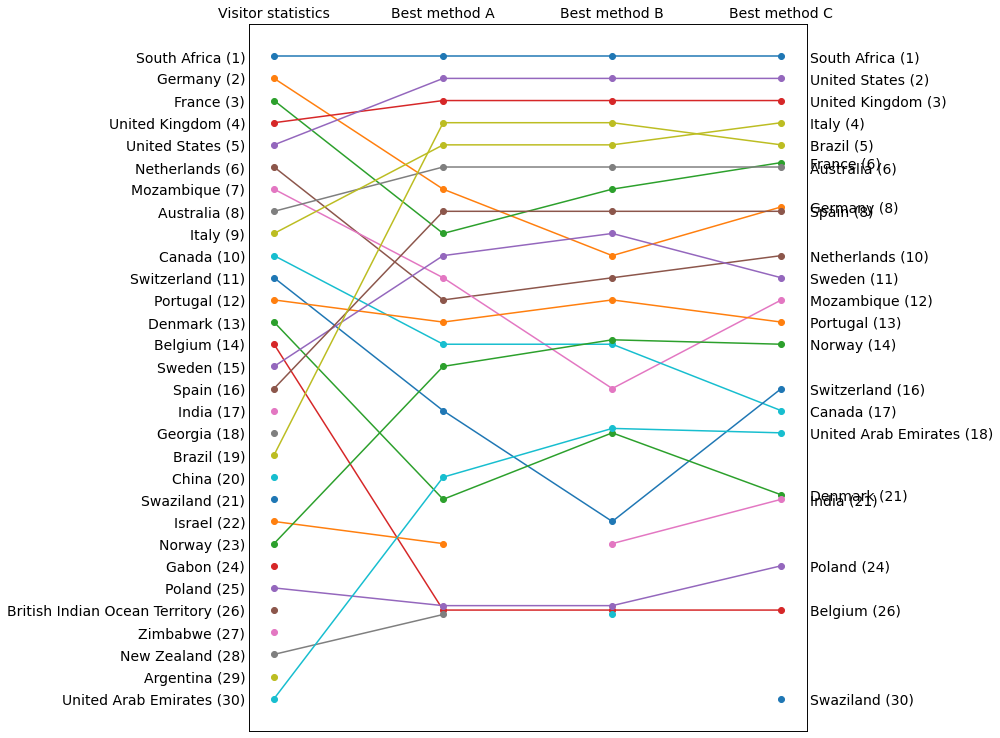

In [42]:

plot_cols=['YEAR2014', 'H_maxmonths', 'H_maxtimedelta', 'H_MedianCenters']
ranks.sort_values(by="YEAR2014", inplace=True)

# Set figure size 
fig, ax = plt.subplots(figsize=(10,13))

# Create plot
#ranks.T.plot(ax=ax, style='o-', legend=False, color='black')
ranks[plot_cols].T.plot(ax=ax, style='o-', legend=False, cmap='RdYlGn')

# Invert so that rank number 1 (South Africa) is at the top
ax.invert_yaxis()

# Set y-axis values for the LEFT side (visitor statistics)
plt.yticks(ranks["YEAR2014"].values, ranks["official_ranks"].values, fontsize=14)
#plt.yticks(range(1,(top+1)), list(ranks.sort_values(by="YEAR2014").index), fontsize=14)
plt.xticks([0,1,2,3], ['Visitor statistics', "Hierarchical\nmax months", "Hierarchical\nmax timedelta","Hierarchical\nmedian centers"], fontsize=14)

# Set a second axis
ax2 = ax.twinx()  

# Plot data also on this axis (to get the y-axis match..)
ranks[plot_cols].T.plot(ax=ax2, style='', legend=False, color='black', alpha=0)

# Invert so that rank number 1 (South Africa) is at the top
ax2.invert_yaxis()


# Plot y-axis values for the RIGHT side (maxdays-method)
plt.yticks(ranks.sort_values(by=last_column)[last_column].values, ranks.sort_values(by=last_column)["last_column_ranks"].values, fontsize=14)
#plt.yticks(ranks[last_column].values, labels2, fontsize=14)

# Add whitespace to x axis margins
#ax.margins(x=.1)
#ax2.margins(x=.1)

# Remove tick sticks
ax.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)

# Place x-axis labels at the top of the plot
ax.xaxis.tick_top()

# X-axis labels
plt.xticks([0,1,2,3], ['Visitor statistics', "Best method A", "Best method B", "Best method C"], fontsize=20)


plt.savefig("./../valid_results/slopegraph_top3_methods.png", bbox_inches='tight')
#plt.savefig("fig/slopegraph_top3_methods.svg", bbox_inches='tight')


 Figure was finalized in inkscape (import as svg.)